# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
rep_count = north_df['Rep ID'].nunique()
rep_count
print("Total Number of Reps in North Branch: ", rep_count)

Total Number of Reps in North Branch:  9


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
rep_count1 = south_df['Rep ID'].nunique()
rep_count1
print("Total Number of Reps in South Branch: ", rep_count1)

Total Number of Reps in South Branch:  11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [45]:
#Code Used:
print(north_df.columns)
avg_busy_mins = north_df['Busy Minutes'].mean()
print("Busy Minutes:",round(avg_busy_mins,2))

avg_not_ready_mins = north_df['Not Ready Minutes'].mean()
print("Not Ready Minutes:",round(avg_not_ready_mins,2))

avg_incoming_wait_time = north_df['Incoming Wait Time'].mean()
print("Incoming Wait Time:",round(avg_incoming_wait_time, 2))

avg_during_call_mins = north_df['During Call Wait Time'].mean()
print("During Call Wait Time:",round(avg_during_call_mins,2))

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')
Busy Minutes: 9.99
Not Ready Minutes: 1.91
Incoming Wait Time: 3.05
During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
print(south_df.columns)
avg_busy_mins_south = south_df['Busy Minutes'].mean()
print("Busy Minutes:",round(avg_busy_mins_south,2))

avg_not_ready_mins_south = south_df['Not Ready Minutes'].mean()
print("Not Ready Rinutes:",round(avg_not_ready_mins_south,2))

avg_incoming_wait_time_south = south_df['Incoming Wait Time'].mean()
print("Incoming Wait Time:",round(avg_incoming_wait_time_south, 2))

avg_during_call_mins_south = south_df['During Call Wait Time'].mean()
print("During Call Wait Time:",round(avg_during_call_mins_south,2))

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')
Busy Minutes: 10.05
Not Ready Rinutes: 1.91
Incoming Wait Time: 3.0
During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used:
print("Total Calls Combined North Branch and South Branch")
total_calls = north_df['Time Block'].value_counts()["9:00 AM"] + south_df['Time Block'].value_counts()["9:00 AM"]
print(total_calls)

total_calls1 = north_df['Time Block'].value_counts()["10:00 AM"] + south_df['Time Block'].value_counts()["10:00 AM"]
print(total_calls1)

total_calls2 = north_df['Time Block'].value_counts()["11:00 AM"] + south_df['Time Block'].value_counts()["11:00 AM"]
print(total_calls2)

total_calls3 = north_df['Time Block'].value_counts()["12:00 PM"] + south_df['Time Block'].value_counts()["12:00 PM"]
print(total_calls3)

total_calls4 = north_df['Time Block'].value_counts()["1:00 PM"] + south_df['Time Block'].value_counts()["1:00 PM"]
print(total_calls4)

total_calls5 = north_df['Time Block'].value_counts()["2:00 PM"] + south_df['Time Block'].value_counts()["2:00 PM"]
print(total_calls5)
total_calls6 = north_df['Time Block'].value_counts()["3:00 PM"] + south_df['Time Block'].value_counts()["3:00 PM"]
print(total_calls6)
total_calls7 = north_df['Time Block'].value_counts()["4:00 PM"] + south_df['Time Block'].value_counts()["4:00 PM"]
print(total_calls7)
total_calls8 = north_df['Time Block'].value_counts()["5:00 PM"] + south_df['Time Block'].value_counts()["5:00 PM"]
print(total_calls8)

Total Calls Combined North Branch and South Branch
10
99
56
120
40
65
73
53
43


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11

- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in 'Incoming Wait Time' column in both datasets 'North' and 'South'. 
First we plot Heatmap to check how much data is missing. If there is a significant number of missing data and if it is important information we will impute the missing with constant values(in this case 0 as the column is integer and instead of dropping the column as this may be important)

<Axes: >

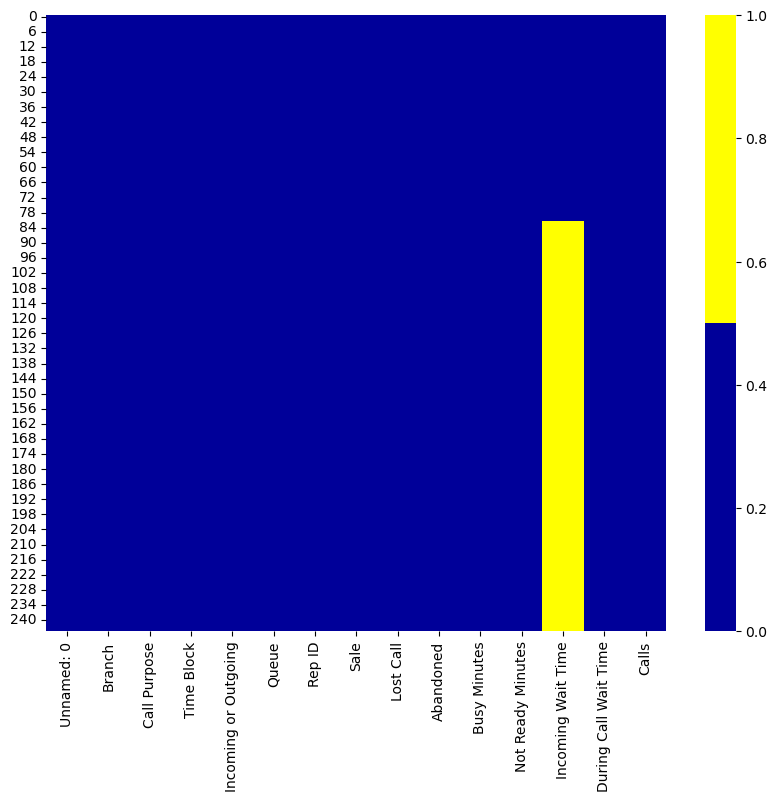

In [9]:
# Code Used
# Add Additional Cells as needed.
# Heatmap to identify missing data for North Call Center

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = north_df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(north_df[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

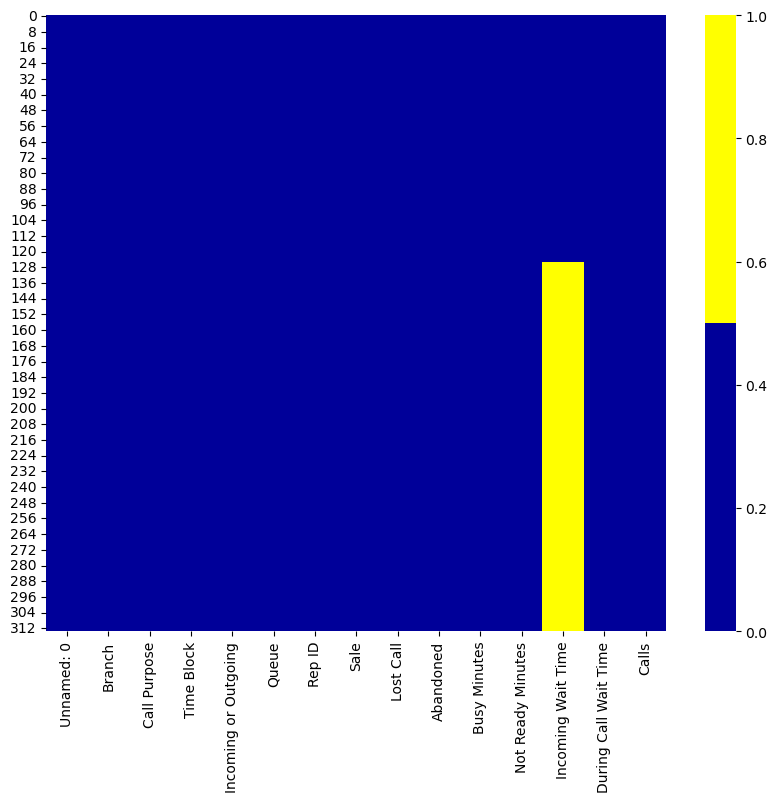

In [10]:
# Code Used
# Add Additional Cells as needed.
# Heatmap to identify missing data for South Call Center

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = south_df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(south_df[cols].isna(), cmap=sns.color_palette(colours))

In [11]:
# Imputing missing 'Incoming Wait Time' with 0 in North Call Center Dataset
df_copy = north_df.copy()
df_copy['Incoming Wait Time'] = df_copy['Incoming Wait Time'].fillna(0)
df_copy

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1


In [12]:
# Imputing missing 'Incoming Wait Time' with 0 in South Call Center Dataset
df_copy = south_df.copy()
df_copy['Incoming Wait Time'] = df_copy['Incoming Wait Time'].fillna(0)
df_copy

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There is an unecessary duplicate values in the North call center dataset.There are 2 separate 'YES'values with space and without. I used unique() values in 'Sale' column to display those diff values and use replace function to correct those.

In [13]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [14]:
#finding and replacing column
north_df['Sale']=north_df['Sale'].replace('YES ', 'YES')
unique_names = north_df["Sale"].unique()
print(unique_names)

['NO' 'YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in both the data sets. I ran indentifying duplicate rows in both data sets and they both show that there are no duplicates or 0 duplicates.

In [15]:
#Code Used
# Add Additional Cells as needed.
#finding duplicate rows in North Call Center Dataset
duplicates = north_df.duplicated()
print(north_df[duplicates])
print(duplicates.sum())

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
0


In [16]:
duplicates_south = south_df.duplicated()
print(south_df[duplicates_south])
print(duplicates_south.sum())

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
0


In [17]:
dropped_north = north_df.drop('Calls', axis = 1)
dropped_north

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM. And in call column has a same value of 1 call which is unnecessary as assigned same value to all rows. So dropping of this column would be a great Data Cleaning and does not affect both datasets.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [18]:
# Create dataframe for the entire company named df
# df= df_north.append(df_south)
# df
df = pd.merge(north_df, south_df, how ='outer')
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [19]:
df.shape

(559, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent - 37 Calls
- South Branch = Eric - 35 Calls

In [20]:
# Code Used
# Add Additional Cells as needed. Calls to count hightest number with Rep name and ID 
# north_center = north_df.groupby('Rep ID')['Calls'].sum()
# north_center
df.groupby(['Branch'])['Rep ID'].value_counts()

Branch  Rep ID
North   Brent     37
        Lilly     30
        Duke      29
        Todd      29
        Joe       26
        Cam       24
        Xander    24
        Amanda    23
        Andy      23
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
        George    29
        Kate      29
        Karl      28
        Josh      26
        Susan     26
        Sharon    25
        Alice     20
Name: Rep ID, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97% 
- Do any of these fall out of the optimal range of 2-5%? - Yes. South branch has a range of 1.27% and Company wide range is 1.97% They are both below optimal range. Noth branch is within the range as it is 2.86%.

In [21]:
# Abandoned call in North Branch
counts = north_df[['Abandoned','Calls']].value_counts()
print("Abandoned call:",counts)

Abandoned call: Abandoned  Calls
0          1        238
1          1          7
dtype: int64


In [22]:
# Code Used
# Add Additional Cells as needed
# Abandonent Calls count average for North Call Center

north_avg = (north_df['Abandoned'].agg('mean'))*100
print("Average Abandoned Call rate for North Branch:",round(north_avg,2))

Average Abandoned Call rate for North Branch: 2.86


In [29]:
# Abandoned call in South Branch
count_south = south_df[['Abandoned','Calls']].value_counts()
print("Abandoned call:",count_south)

Abandoned call: Abandoned  Calls
0          1        310
1          1          4
dtype: int64


In [30]:
#  Abandonent Calls count average for South Call Center
south_avg = (south_df['Abandoned'].agg('mean'))*100
print("Average Abandoned Call rate for South Branch:",round(south_avg,2))

Average Abandoned Call rate for South Branch: 1.27


In [31]:
# Abandoned call compnay wide both Branch
df_count = df[['Abandoned','Branch']].value_counts()
df_count

Abandoned  Branch
0          South     310
           North     238
1          North       7
           South       4
dtype: int64

In [32]:
#Abandoned avegrage calls company wide both brnach
df_avg = (df['Abandoned'].agg('mean'))*100
print("Average Abandoned Call rate for Both 'North and Sounth Branch' company wide:",round(df_avg,2))

Average Abandoned Call rate for Both 'North and Sounth Branch' company wide: 1.97


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:

- North Branch = 13.47% with 33 out of 245 call answered within 2 seconds
- South Branch = 15.29% with 48 out of 314 call answered within 2 seconds
- Company Wide = 14.49% with 81 out of 559 call answered within 2 seconds

In [34]:
# Service level is another KPI for North Branch
north_calls = north_df['Calls'].value_counts()
print("Total North Branch Calls",north_calls)
service_level = (north_df["Incoming Wait Time"] <= 2.0).sum()*100
print("Total Calls answered in 2 seconds North branch:", (service_level/100))
n_f = service_level.sum()/100
percent_north =(n_f/north_calls)*100
print("Percentage of calls Answer within North Branch:",round(percent_north,2))

Total North Branch Calls 1    245
Name: Calls, dtype: int64
Total Calls answered in 2 seconds North branch: 33.0
Percentage of calls Answer within North Branch: 1    13.47
Name: Calls, dtype: float64


In [36]:
# Service level is another KPI for South Branch
south_calls = south_df['Calls'].value_counts()
print("Total South Branch Calls:",south_calls)
service_level1 = (south_df["Incoming Wait Time"] <= 2).sum()*100
print("Total Calls answered in 2 seconds South branch:",(service_level1/100))
s_f = service_level1.sum()/100
percent_south =(s_f/south_calls)*100
print("Percentage of calls Answer within South Branch:",round(percent_south,2))

Total South Branch Calls: 1    314
Name: Calls, dtype: int64
Total Calls answered in 2 seconds South branch: 48.0
Percentage of calls Answer within South Branch: 1    15.29
Name: Calls, dtype: float64


In [38]:
# Code Used
# Add Additional Cells as needed.
# For compnay wide both Branches
total_calls = df['Calls'].value_counts()
print("Total calls companywide:", total_calls)
service_level2 = (df["Incoming Wait Time"] <= 2.0).sum()*100
print("Total Calls answered in 2 seconds Company Wide:",(service_level2/100))
total_f = service_level2.sum()/100
percent_total =(total_f/total_calls)*100
print("Percentage of calls Answer within Company Wide:",round(percent_total,2))

Total calls companywide: 1    559
Name: Calls, dtype: int64
Total Calls answered in 2 seconds Company Wide: 81.0
Percentage of calls Answer within Company Wide: 1    14.49
Name: Calls, dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 (rounded)
- South Branch in seconds = 3.00 (rounded)
- Company Wide in seconds = 3.02 (rounded)


In [41]:
# Code Used
#Filling nan values in 'Incoming Wait Time' with the average value
#north_df['Incoming Wait Time'].fillna(value=north_avg_speed, inplace=True)
# Average speed of answer North Branch:
Avg_speed_answer_north = north_df["Incoming Wait Time"].mean()
print("Average speed of answer North Branch:",round(Avg_speed_answer_north,2))

Average speed of answer North Branch: 3.05


In [42]:
# Average speed of answer South Branch:
#Filling nan values in 'Incoming Wait Time' with the average value
#north_df['Incoming Wait Time'].fillna(value=south_avg_speed, inplace=True)

Avg_speed_answer_south = south_df["Incoming Wait Time"].mean()
print("Average speed of answer South Branch:",round(Avg_speed_answer_south,2))

Average speed of answer South Branch: 3.0


In [44]:
# Average speed of answer Company Wide:
#Filling nan values in 'Incoming Wait Time' with the average value
#df['Incoming Wait Time'].fillna(value=Company_avg_speed, inplace=True)

Avg_speed_answer_both = df["Incoming Wait Time"].mean()
print("Average speed of answer Both Branches:",round(Avg_speed_answer_both,2))

Average speed of answer Both Branches: 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:
 {A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

> Chart style you chose and why: 
Bar graphs can help you compare data between different groups or to track changes over time. Bar graphs are most useful when there are big changes or to show how one group compares against other groups. As being a call center the calls in Queue and Abandent calls rate may vary which can be easily seen plotting on Bar chart

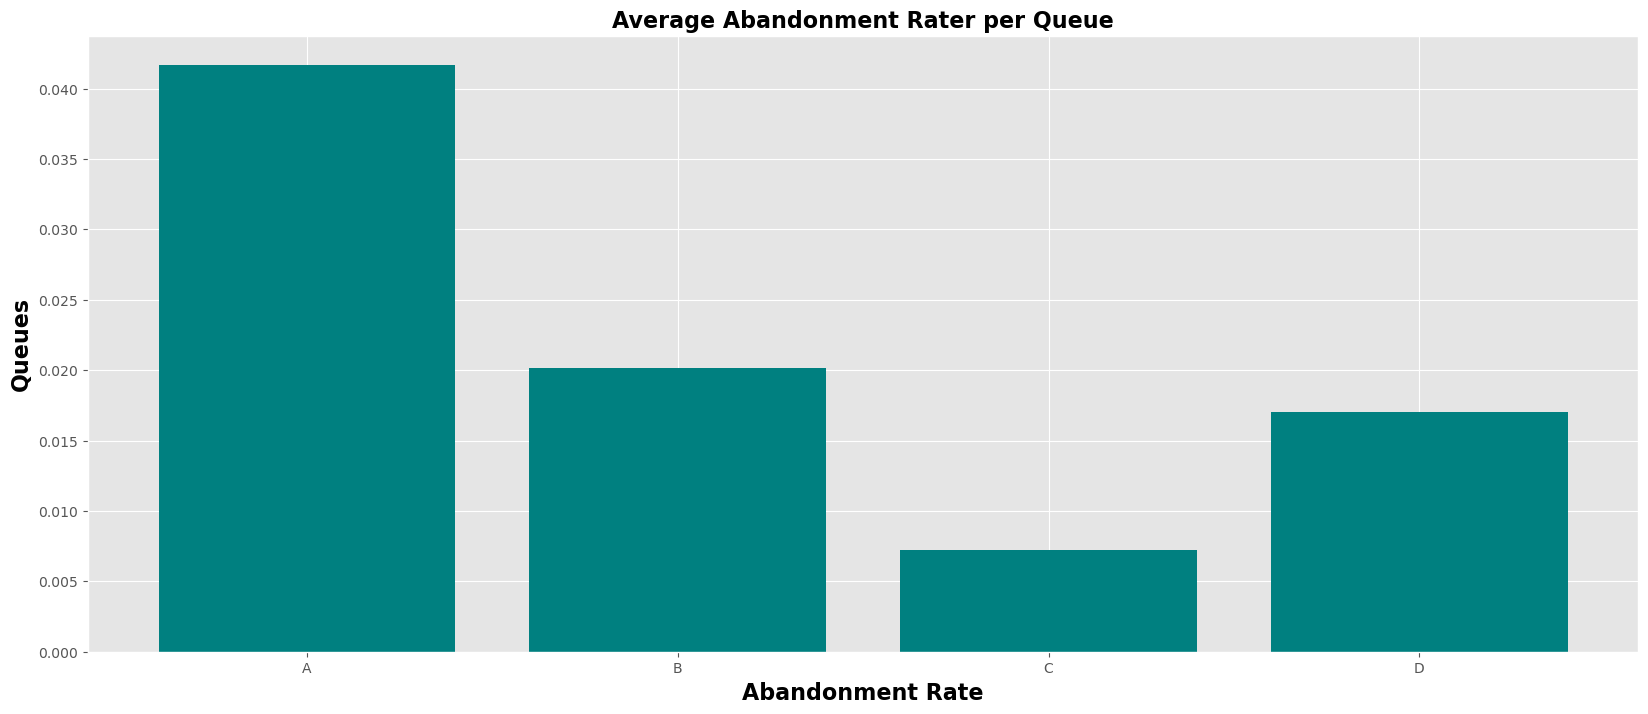

In [266]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum",numeric_only=True)
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
keys=abandonment_rates.keys()
values=abandonment_rates.values()

plt.figure(figsize=(20, 8))
plt.bar(keys, values, color='teal')

plt.xlabel('Abandonment Rate', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Queues', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Average Abandonment Rater per Queue', color = 'black', fontsize = 16, fontweight = 'bold')
plt.show()

In [270]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [245]:
queue_dict

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,
A,11084,1,4,946,181,116.0,272,96
B,18806,4,3,1501,288,134.0,455,149
C,21602,4,1,1409,251,160.0,435,138
D,27539,7,3,1748,349,218.0,531,176


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

Service level percentage North Branch = 10.51% 
Average speed of asnwer for each rep in North branch = 3.05%

> Chart style you chose and why: A grouped bar chart is used when you want to look at how the second category variable changes within each level of the first, or when you want to look at how the first category variable changes across levels of the second. Here in this case, incoming wait time changes as per the Rep availble to take the calls for North Branch.

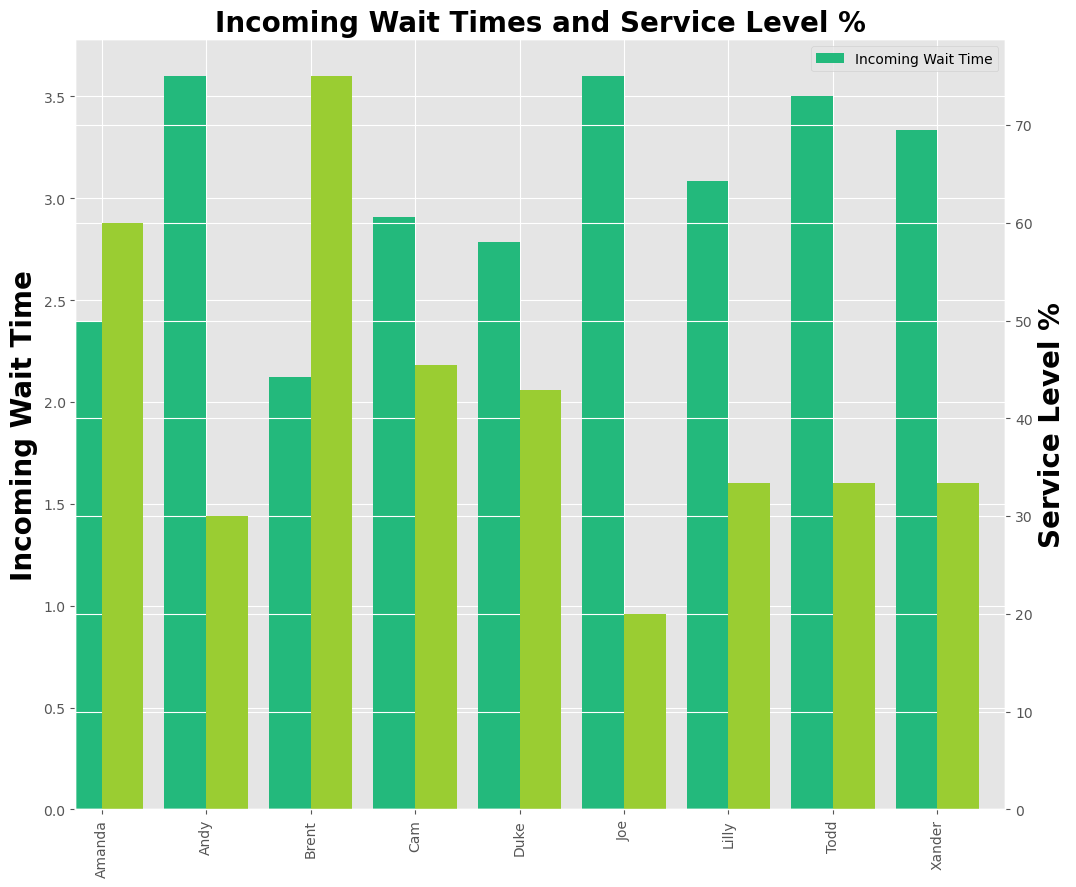

In [283]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

fig = plt.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

north_plt.plot(kind='bar', color='#23B97C', ax=ax, width=width, position=1)
service_level["Service Level %"].plot(kind='bar', color='yellowgreen', ax=ax2, width=width, position=0)

ax.set_ylabel('Incoming Wait Time',color = 'black', fontsize = 20, fontweight = 'bold')
ax2.set_ylabel('Service Level %',color = 'black', fontsize = 20, fontweight = 'bold')

plt.title('Incoming Wait Times and Service Level %', color = 'black', fontsize = 20, fontweight = 'bold')

plt.show()

#Grouped bar chart shows each reps Service Level % and Incoming Wait time.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75

> Chart style you chose and why: Selected the grouped bar chart to clearly see how many calls by purpose were incoming and outgoing. The grouped bar graph is also called the clustered bar graph, which is used to represent the discrete value for more than one object that shares the same category. In this type of bar chart, the total number of instances are combined into a single bar.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


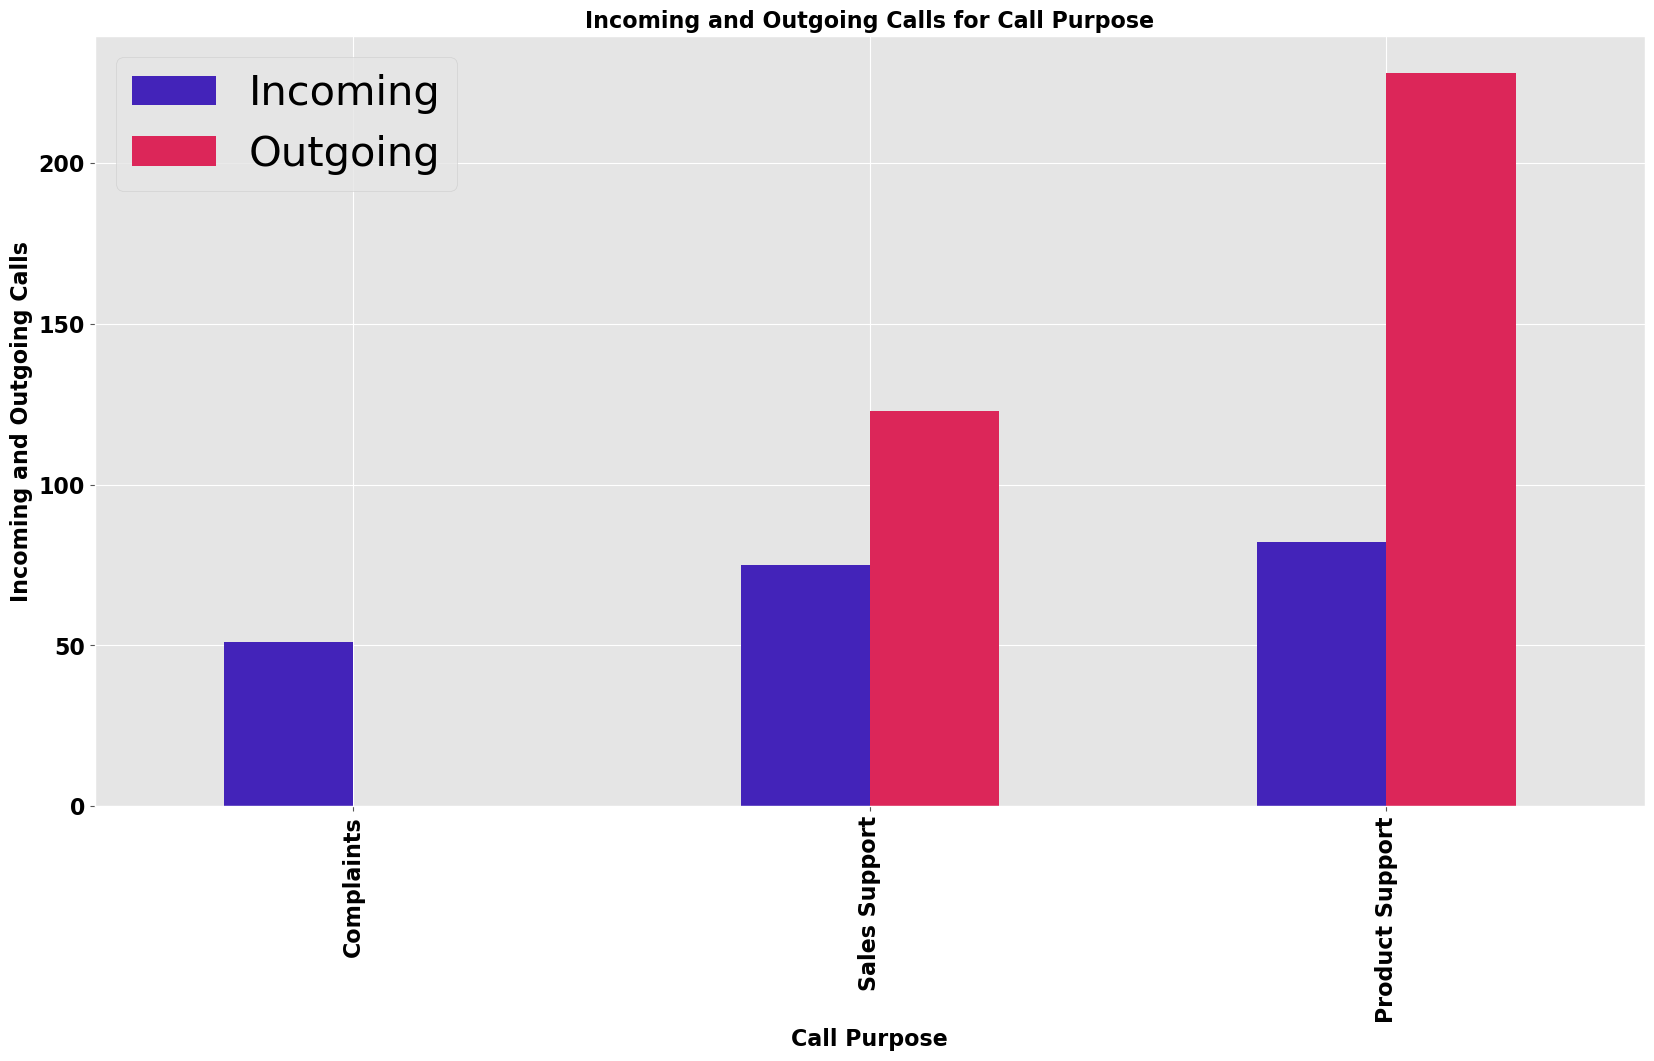

In [288]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

d=pd.DataFrame(data).T
d.plot(kind='bar', color=['#4323B9', '#DC2659'])
plt.xlabel('Call Purpose', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Incoming and Outgoing Calls', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Incoming and Outgoing Calls for Call Purpose', color = 'black', fontsize = 16, fontweight = 'bold')
plt.legend(['Incoming', 'Outgoing'], loc = 'upper left', prop={'size': 30}, fontsize = 15)
plt.xticks(color = 'black',fontsize=16, fontweight='bold')
plt.yticks(color = 'black',fontsize=16, fontweight='bold')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
The South branch is operating more efficiently. South branch abandonment rate=1.27%, sevice level=15.29%, and average speed of answer=3.0 which is better than the North branch which has abandonment rate=2.86%, service level=13.47%, and average speed of answer= 3.05. The south branch has 11 reps while the north branch only has 9 which could account for the efficiency of each branch. It will be better to add more reps to North Branch to increase service level efficiency.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Due to the better efficiency of the South branch, the North branch would benefit more from adding new reps. The South branch currently has 11 reps while the North branch only has 9 which could be contribting to how quickly the reps are working.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
Overall it was a good practice to use the EDA, Cleaning, Manipulation and Vizualization techniques. Little more elaboration on the Cleaning questions as initially not able to understand what exactly needed. Else both excels are good to practice and do the analysis.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: